In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
import cv2
import glob
get_ipython().run_line_magic('matplotlib', 'inline')

D:images\download.jpg


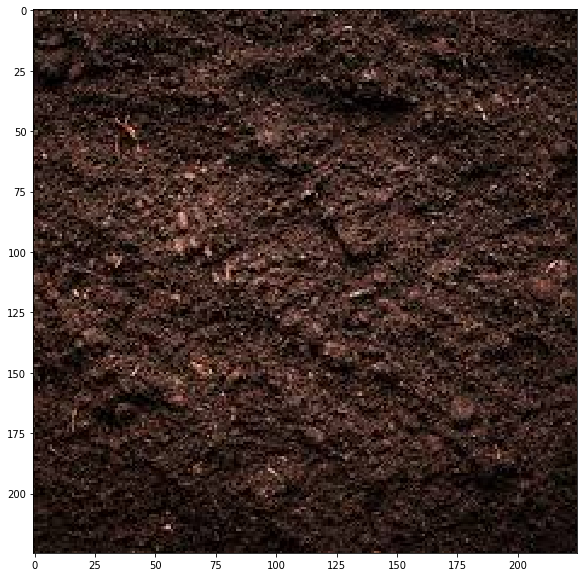

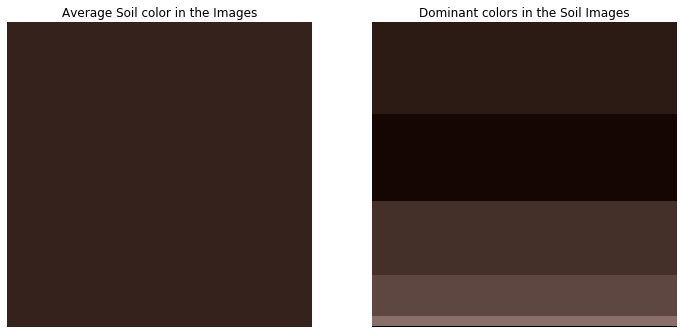

In [2]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image
X_data = []
files = glob.glob ("D:images/*.jpg")
plt.figure(figsize=(20, 10))
for i in range(len(files)):
    plt.subplot(1, len(files), i+1)
    plt.title="Images Under Analysis"
    plt.imshow(get_image(files[i]))
for myFile in files:
    print(myFile)
    image=get_image(myFile)
    X_data.append (image)
    average = image.mean(axis=0).mean(axis=0)
    pixels = np.float32(image.reshape(-1, 3))

n_colors = 5
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, .1)
flags = cv2.KMEANS_RANDOM_CENTERS

_, labels, palette = cv2.kmeans(pixels, n_colors, None, criteria, 10, flags)
_, counts = np.unique(labels, return_counts=True)

avg_patch = np.ones(shape=image.shape, dtype=np.uint8)*np.uint8(average)

indices = np.argsort(counts)[::-1]   
freqs = np.cumsum(np.hstack([[0], counts[indices]/counts.sum()]))
rows = np.int_(image.shape[0]*freqs)

dom_patch = np.zeros(shape=image.shape, dtype=np.uint8)
for i in range(len(rows) - 1):
    dom_patch[rows[i]:rows[i + 1], :, :] += np.uint8(palette[indices[i]])

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12,6))
ax0.imshow(avg_patch)
ax0.set_title('Average Soil color in the Images')
ax0.axis('off')
ax1.imshow(dom_patch)
ax1.set_title('Dominant colors in the Soil Images')
ax1.axis('off')
plt.show(fig)
modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)


In [3]:
print(average.astype(int))

[53 34 29]
